In [1]:
# 导入python包，科学计算三大天王
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 魔法命令，jupyter使用plt绘图的时候，输出静态图片
# 除了inline还有auto和notebook，auto是单独开一个绘图窗口，notebook不仅单开窗口，图片还可以放大缩小
%matplotlib inline

import os
print(os.listdir("./input"))               # 输出指定文件夹中所包含的文件/文件夹名称
import warnings
warnings.filterwarnings("ignore")

['LSWMD.pkl']


In [2]:
# 读取数据集并输出数据集概览，该数据集总共811457行6列，列分别为
# 晶圆图、有问题的晶粒数量【？】、批次名称、晶圆在所属批次中的编号（6表示所属批次的第6个晶圆图）、训练/测试标签、失败类型
# 其中trainTestLabel是已经由专家人工识别后labeled的，本ipynb中忽略该部分，并会在后面重新将数据集分为训练集和测试集
df = pd.read_pickle("./input/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [3]:
df.head()               # 返回数据前n行（默认为5）


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [4]:
df.tail()               # 返回数据最后n行


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


<function matplotlib.pyplot.show(close=None, block=None)>

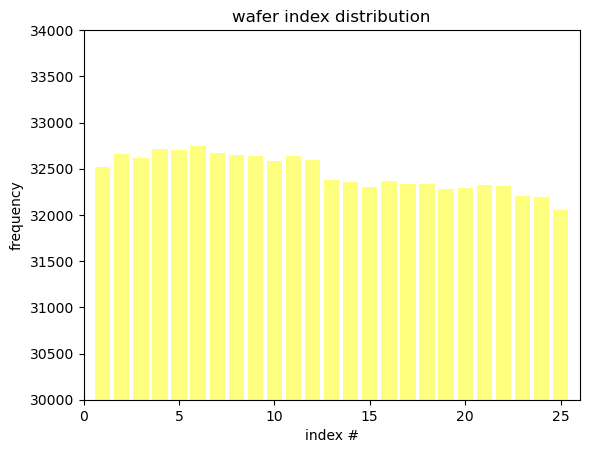

In [5]:
# unique()去除一维数组中重复元素，return_counts范围数组中每种元素出现的次数
uni_Index = np.unique(df.waferIndex, return_counts=True)
# plt.bar()绘制柱状图，alpha是透明度，align是对齐方式（center是默认方式）
plt.bar(uni_Index[0], uni_Index[1], color='yellow', align='center', alpha=0.5)
plt.title("wafer index distribution")       # 图标标题，实测无法输出中文
plt.xlabel("index #")                       # x轴标签
plt.ylabel("frequency")
plt.xlim(0, 26)                             # x轴范围[0, 25)
plt.ylim(30000, 34000)
plt.show


In [6]:
df = df.drop(['waferIndex'], axis=1)          # 删除数据集中的waferMap属性，axis=1表示列属性


In [7]:
# np.size()返回数组中所有元素个数（2x3的二维数组就返回6），axis=0返回一行有几个元素，axis=1返回列中元素个数
def find_dim(x):
    dim0 = np.size(x, axis=0)
    dim1 = np.size(x, axis=1)
    return dim0,dim1

# 给数据集新增属性waferMapDim，新增内容为对数据集中waferMap属性执行函数find_dim()所获得的元素(dim0, dim1)
df['waferMapDim'] = df.waferMap.apply(find_dim)
df.sample(5)                    # 数据集中简单随机抽样5行


,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
416532,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2367.0,lot24822,[],[],"(51, 59)"
42626,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot3708,[],[],"(25, 27)"
159622,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot10284,[],[],"(25, 27)"
228487,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4553.0,lot14336,[],[],"(73, 79)"
370627,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2887.0,lot22151,[],[],"(61, 60)"


In [8]:
# 输出最大的和最小的晶圆图尺寸
print("Maximum dimension of wafer map: ", max(df.waferMapDim))
print("Minimum dimension of wafer map: ", min(df.waferMapDim))


Maximum dimension of wafer map:  (300, 202)
Minimum dimension of wafer map:  (6, 21)
